In [1141]:
# Import the pathlib and csv library
from pathlib import Path
import pandas as pd
import panel as pn
import pygal
import csv
import numpy as np
import seaborn as sns
import hvplot.pandas
import matplotlib.pyplot as plt
import plotly.express as px
from pygal.style import Style
%matplotlib inline
pn.extension()

# Set the file paths

crypto_path = Path("Data/crypto_user_growth_aus.csv")
gym_est_path = Path("Data/gym_establishments.csv")
gym_user_path = Path("Data/gym_users.csv")
total_ops_path = Path("Data/total_operational_savings_edited.csv")
smart_path = Path("Data/smartphone_users.csv")
coin_path = Path("Data/coin_bitcoin.csv")
crypto_user_path = Path("Data/crypto_user_growth_aus.csv")
wallet_user_path = Path ("Data/my-wallet-n-users.csv")

In [1107]:
# Reading in the crypto user growth
## Display Crypto user dataframe

crypto_df = pd.read_csv(crypto_path, index_col="year")

In [1108]:
# Reading in the gym establishments
## Display gym establishments dataframe

gym_est_df = pd.read_csv(gym_est_path, index_col="year")

In [1109]:
# Reading in the gym user
## Display gym user dataframe

gym_user_df = pd.read_csv(gym_user_path, index_col = "age")
gym_user_df = gym_user_df.drop("No", axis=1)

In [1110]:
# Reading in the total operational savings
## Display total operational savings dataframe

total_ops_df = pd.read_csv(total_ops_path).set_index(['Business','Transaction_Occurence'])
total_ops_df.head()

Business_Price  Total_Cost_Business  \
Business     Transaction_Occurence                                        
debitsuccess 100                              1.74                  174   
             1000                             1.74                 1740   
             10000                            1.74                17400   
             100000                           1.74               174000   
payadvantage 100                              0.88                   88   

                                    Blockchain_Hedera_Price  \
Business     Transaction_Occurence                            
debitsuccess 100                                    0.00014   
             1000                                   0.00014   
             10000                                  0.00014   
             100000                                 0.00014   
payadvantage 100                                    0.00014   

                                    Total_Cost_hedera     Savings  
Business     Transaction_Occurence                                 
debitsuccess 100                                0.014     173.986  
             1000                               0.140    1739.860  
             10000                              1.140   17398.600  
             100000                            11.400  173986.000  
payadvantage 100                                0.014      87.986

In [1111]:
# Create Function for Hvplot and to put in Dashboard
def total_ops_lineplot_plot( 
    
    total_ops_lineplot = total_ops_df.hvplot.line(stacked=False,groupby='Business',widget_location='top_left',line_width=3,yformatter='%0f',xformatter='%0f',value_label='Amount($)',
                                              y=['Total_Cost_Business','Total_Cost_hedera'], title='Total Cost Comparison'
                                              ,width=1000,height=500)
): 
    return total_ops_lineplot

In [1112]:
def total_ops_areaplot( 
    
    total_ops_areaplot = total_ops_df.hvplot.area(stacked=True,groupby='Business',widget_location='top_left',line_width=3,yformatter='%0f',xformatter='%0f',value_label='Amount($)',
                                              y=['Total_Cost_Business','Total_Cost_hedera','Savings'], title='Total Cost Comparison'
                                              ,width=1000,height=500,shared_axes=False)
): 
    return total_ops_areaplot

In [1113]:
def total_ops_lineplot_2_plot( 
    
    total_ops_lineplot_2 = total_ops_df.hvplot.line(stacked=True,groupby='Business',widget_location='top_left',line_width=5,yformatter='%0f',xformatter='%0f',value_label='Amount($)',x='Transaction_Occurence'
                                              ,y=['Business_Price','Blockchain_Hedera_Price'],title='Business vs Blockchain Price'
                                              ,width=1000,height=500,shared_axes=False)

):
    return total_ops_lineplot_2

In [1114]:
def total_opts_table_function(
    
    total_ops_table = total_ops_df.hvplot.table(stacked=True,groupby='Business',widget_location='top_left',line_width=3,yformatter='%0f',xformatter='%0f',value_label='Amount($)',
                                              y=['Total_Cost_Business','Total_Cost_hedera'])
):
    return total_ops_table

Matplotlib(Figure)
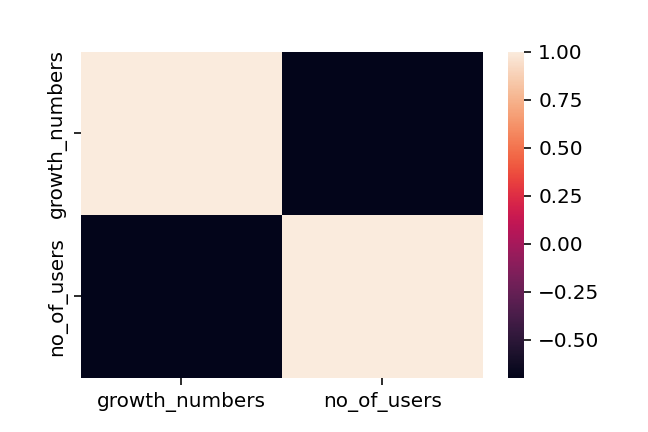

In [1115]:
# Combine smartphone user data with crypto data to find correlation
crypto_smart_phone = pd.concat([crypto_df, smart_df], axis=1).dropna()

# Create correlation plot for smartphone and crypto data

correlation_smartphone_crypto = crypto_smart_phone.pct_change()

# Calculate Correlation
correlation = correlation_smartphone_crypto.corr()

# Create Hvplot.table to put into Dashboard
correlation_table = correlation.hvplot.table()

## Createa a pn.pane using Matplotlib to add to dashboard

fig = plt.Figure(figsize=(4.5, 3))
ax = fig.add_subplot(111)
sns.heatmap(correlation, ax=ax)
pn.pane.Matplotlib(fig)

In [1116]:
def correlation_table_function(
    
    correlation_table = correlation.hvplot.table(stacked=True,line_width=3,yformatter='%0f',xformatter='%0f',value_label='Amount($)')
):
    return correlation_table

In [1117]:
# Create_bar_chart function to plot (bar) dataframes

def create_bar_chart(data, title,xlabel,ylabel,color):

    create_bar_chart = data.hvplot.bar(title=title, xlabel=xlabel, ylabel=ylabel, color=color, height=500)
    
    return(create_bar_chart)

In [1118]:
# Bar chart for crypto dataframe

crypto_bar_chart = create_bar_chart(crypto_df,"Cryptocurrency User Growth (in Years)", "Year", "In Millions ($)", "Orange").opts(yformatter="%.0f")

In [1119]:
# Bar chart for gym establishments dataframe

gym_est_chart = create_bar_chart(gym_est_df,"Number of Gym Establishments (in Years)","Year","Number of gyms","Royalblue")

In [1120]:
# Pygal Chart for gym establishments dataframe

custom_style = Style(background='transparent', colors=('#E853A0', '#E8537A'))

gym_est_chart_pygal = pygal.Bar()
gym_est_chart_pygal.add('Gyms Open', [3900, 4400,4800,5000,5300])
gym_est_chart_pygal.x_labels = (2016,2017,2018,2019,2020)
gym_est_chart_pygal.render_to_file('Plots/gym_est_chart_pygal.svg')

In [1122]:
# Pygal Radar Chart for Gym User Demographic by Age

custom_style = Style(background='transparent', colors=('#E853A0', '#E8537A'))

radar_chart = pygal.Radar(fill=True, style=custom_style)
radar_chart.title = 'Gym User Demographic'
radar_chart.x_labels = ['15-17', '18-24', '25-35', '35-44', '45-54', '55-64', '65-120']
radar_chart.add('Age', [263000,1103000,1720000,1367000,1151000,948000,1312000])
radar_chart.render_to_file('Plots/gym_radar_pygal.svg')

In [984]:
gym_user_df_1 = gym_user_df.reset_index()
gym_user_df_1

In [1074]:
# Reading in the total smartphone users and dropping extra rows
## Display smartphone users dataframe

smart_df = pd.read_csv(smart_path, index_col="year")
smart_df = smart_df.drop("Unnamed: 2", axis=1)
smart_df_dropped = smart_df.drop([2022, 2023, 2024, 2025])
smart_df_crypto_df = [smart_df_dropped, crypto_df]
smart_df_crypto_df_joined = pd.concat(smart_df_crypto_df, axis=1)
smart_df_crypto_df_joined_rename = smart_df_crypto_df_joined.rename(columns={'no_of_users':'smartphone_users', 'growth_numbers':'crypto_users'})
smart_df_crypto_df_joined_rename

,smartphone_users,crypto_users
year,,
2017,18600000,4007640
2018,19600000,4315920
2019,20000000,4726960
2020,20500000,5883010
2021,20600000,7398720


In [1075]:
# Sunburst chart for gym user demographic data

def sunburst_radar(
    
    sunburst_chart = px.sunburst(gym_user_df_1, path=['age','number_of_people'],
                             color='number_of_people', title= 'Gym Usage Per Age Group', values='number_of_people', hover_data=['number_of_people'], color_continuous_scale='purpor',
                                 width=750,height=750)
):
    return sunburst_chart
                                                    

In [1004]:
# Bar chart smartphone users

def smart_user_plot(
    
smart_users_chart =  create_bar_chart(smart_df_dropped,"Number of people using smartphones","Years","Number of people","hotpink",).opts(yformatter="%.0f")
    
):
    return smart_users_chart

In [1076]:
def smart_user_plot_2(
    
smart_df_crypto_df_joined =  smart_df_crypto_df_joined_rename.hvplot.bar(colormap='rainbow',rot=70,fontscale=1.5,height=600,width=800,yformatter="%.0f", xlabel='Year')
    
):
    return smart_df_crypto_df_joined

In [1099]:
## Line Function for Number of People Using Smart Phones

def smart_user_p(
    
smart_users_chart_hv =  smart_df_crypto_df_joined_rename.hvplot.line(title="Number of people using smartphones", x="year", y=['smartphone_users','crypto_users'],
                                                widget_location='top_left',yformatter="%.0f")
    
):
    return smart_users_chart_hv

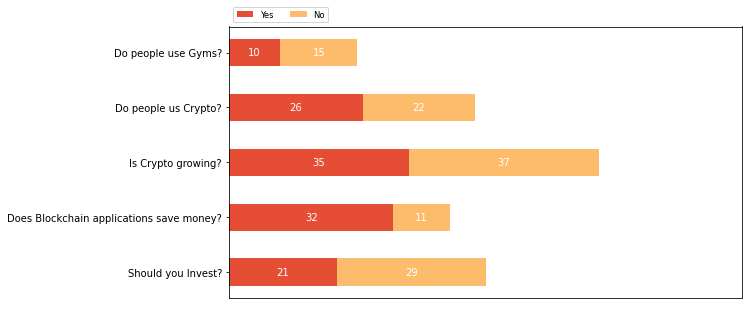

In [1143]:
# Final Summary

category_names = ['Yes','No']
results = {
    'Do people use Gyms?': [10, 15, 17, 32, 26],
    'Do people us Crypto?': [26, 22, 29, 10, 13],
    'Is Crypto growing?': [35, 37, 7, 2, 19],
    'Does Blockchain applications save money?': [32, 11, 9, 15, 33],
    'Should you Invest?': [21, 29, 5, 5, 40],
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

In [1133]:
## Create pn.Row, pn.Column and pn.pane.SVG functions for the Dashboard Presentation

# .PNG and .SVG
pygal_svg = pn.pane.SVG('Plots/gym_est_chart_pygal.svg', width=800, height=600)
gympay_pane = pn.pane.PNG('Images/Gympay.png', width=600)
marketpotential_pane = pn.pane.PNG('Images/market_potential.png')


#pn.Rows

smartphone_users = pn.Row(smart_user_plot,crypto_bar_chart)

#pn.Column
competive_landscape_analysis = pn.Column(total_ops_areaplot,total_ops_lineplot_2_plot,total_opts_table_function)
pvgal_and_sunburst = pn.Column(pygal_svg, sunburst_radar)

In [1137]:
# Create columns and or rows for Dashboard

column = pn.Column(
    ('# Welcome to GymPay.'),
    gympay_pane,
    (print()),
    ('On this project we decided to gather research on blockchain technology and its market potential to change the financial payment services industry, with example given for the Fitness Industry.'),
    (print()),
    ('This Dashboard includes a range of plots to show you the business potential of a blockchain geared product in the Fitness world.'),
    (print()),
    ('Click the Tabs above to shift through each plot and analysis.'),
)

column_market_demographic = pn.Column(
    ('# Demographic Age Group'),
    ('Python Library Used: Ploty Express'),
    sunburst_radar,
    ('# Smartphone & Crypto User Growth'),
    ('Python Library Used: Hvplot'),
    smart_user_plot_2,
    (print()),
    ('# Correlation between Smartphone & Crypto User Growth'),
    ('Python Library Used: Seaborn'),
    fig,
    ('Correlation Table'),
    correlation_table
)

column_competitive_landscape = pn.Column(
    ('# Cost Savings between Traditional vs. Blockchain Products'),
    ('Python Libray Used: Hvplot'),
    total_ops_areaplot,
    (print()),
    ('#Price Difference Between Traditional vs. Blockchain Products'),
    ('Python Libray Used: Hvplot'),
    total_ops_lineplot_2_plot,
    (print()),
    ('Table of Numerical Data'),
    total_opts_table_function
)

column_marketsize_opportunity = pn.Column(
    ('# Current Gym Estabhlishments Australia'),
    ('Python Libray Used: Pygal'),    
    pygal_svg,
    ('# Market Potential Summary'),
    marketpotential_pane
)

column_summary = pn.Column(
    ('# Summary'),
    ('Python Libray Used: Pygal'),    
)

In [1138]:
# Create Dashboard Tabs
dashboard = tabs = pn.Tabs(
        ## hello
    ("Welcome", column),
    ('Market Demographic', column_market_demographic),
    ('Market Size and Opportunity', column_marketsize_opportunity),
    ('Competitive Landscape',column_competitive_landscape),
    ('Summary',column_summary)
    
)

Tabs
    [0] Column
        [0] Markdown(str)
        [1] PNG(str, width=600)
        [2] Str(None)
        [3] Markdown(str)
        [4] Str(None)
        [5] Markdown(str)
        [6] Str(None)
        [7] Markdown(str)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive788901')
        [3] Markdown(str)
        [4] Markdown(str)
        [5] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars, name='interactive788912')
        [6] Str(None)
        [7] Markdown(str)
        [8] Markdown(str)
        [9] Matplotlib(Figure)
        [10] Markdown(str)
        [11] HoloViews(Table)
    [2] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] SVG(str, height=600, sizing_mode='fixed', width=800)
        [3] Markdown(str)
        [4] PNG(str)
    [3] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Column
            [0] Column()
            [1] Row
                [0] Column
                    [0] Row
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='Business', options=['debitsuccess', ...], value='debitsuccess', width=250)
                        [1] HSpacer()
                    [1] HoloViews(DynamicMap, widget_location='top_left')
        [3] Str(None)
        [4] Markdown(str)
        [5] Markdown(str)
        [6] Column
            [0] Column()
            [1] Row
                [0] Column
                    [0] Row
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='Business', options=['debitsuccess', ...], value='debitsuccess', width=250)
                        [1] HSpacer()
                    [1] HoloViews(DynamicMap, widget_location='top_left')
        [7] Str(None)
        [8] Markdown(str)
        [9] Column
            [0] Column()
            [1] Row
                [0] Column
                    [0] Row
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='Business', options=['debitsuccess', ...], value='debitsuccess', width=250)
                        [1] HSpacer()
                    [1] HoloViews(DynamicMap, widget_location='top_left')
    [4] Column
        [0] Markdown(str)
        [1] Markdown(str)
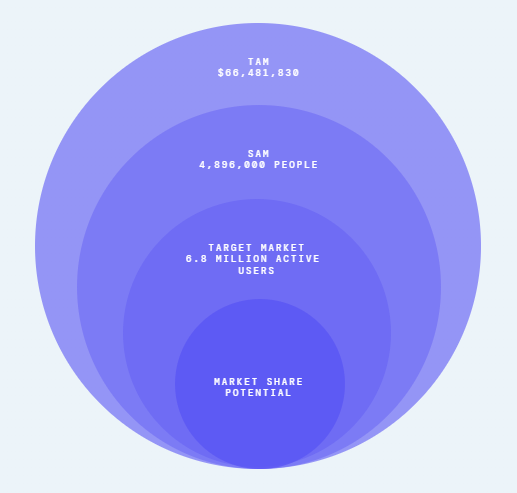
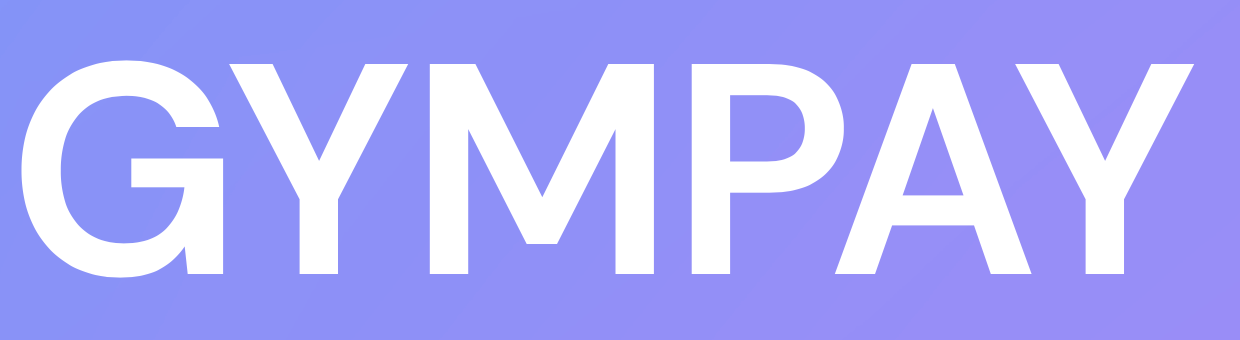
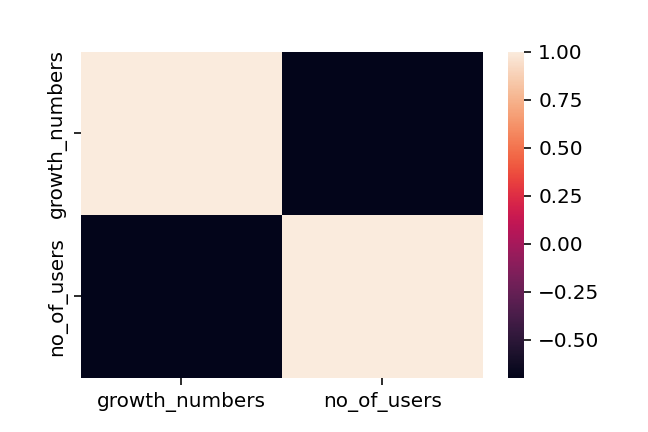

In [1139]:
dashboard.servable()